In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ratings_Beauty.csv")
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [3]:
# Drop null values
df = df.dropna()

In [5]:
agg_df = pd.DataFrame()
agg_df['sales'] = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
agg_df

,sales
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1
...,...
B00LORWRJA,1
B00LOS7MEE,1
B00LP2YB8E,1


In [6]:
agg_df['avg_rating'] = pd.DataFrame(df.groupby('ProductId')['Rating'].mean())
agg_df

,sales,avg_rating
ProductId,,
0205616461,1,5.0
0558925278,2,4.0
0733001998,1,4.0
0737104473,1,1.0
0762451459,1,5.0
...,...,...
B00LORWRJA,1,5.0
B00LOS7MEE,1,5.0
B00LP2YB8E,1,5.0


In [7]:
agg_df['popularity'] = agg_df['sales']*agg_df['avg_rating']
agg_df

,sales,avg_rating,popularity
ProductId,,,
0205616461,1,5.0,5.0
0558925278,2,4.0,8.0
0733001998,1,4.0,4.0
0737104473,1,1.0,1.0
0762451459,1,5.0,5.0
...,...,...,...
B00LORWRJA,1,5.0,5.0
B00LOS7MEE,1,5.0,5.0
B00LP2YB8E,1,5.0,5.0


In [10]:
most_popular_df = agg_df.sort_values('popularity', ascending=False).head(10)
most_popular_df

,sales,avg_rating,popularity
ProductId,,,
B001MA0QY2,7533,4.321386,32553.0
B0043OYFKU,2477,4.310456,10677.0
B0009V1YR8,2869,3.568839,10239.0
B0000YUXI0,2143,4.405040,9440.0
B003V265QW,2088,4.365421,9115.0
B000ZMBSPE,2041,4.422342,9026.0
B003BQ6QXK,1918,4.625652,8872.0
B004OHQR1Q,1885,4.465782,8418.0
B00121UVU0,1838,4.538085,8341.0


In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

<AxesSubplot:xlabel='ProductId'>

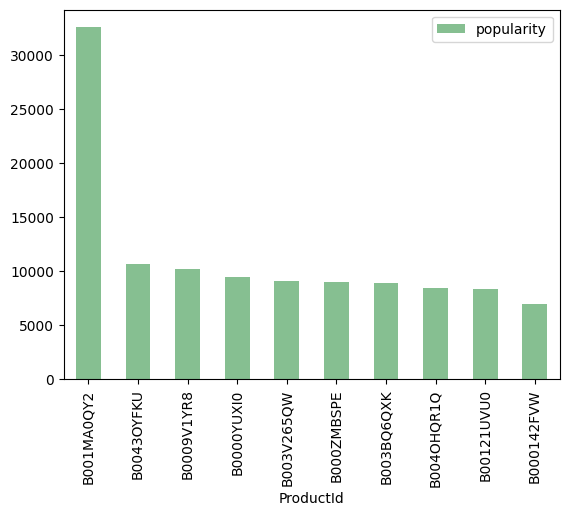

In [11]:
most_popular_df.plot(y='popularity', kind="bar", color='#86bf91')